In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient



In [ ]:
# Đọc dữ liệu từ file CSV
file_path = './laptopData.csv'
df = pd.read_csv(file_path)

# Chọn các cột 'Company', 'Typename', 'Ram', 'OpSys'
df_selected = df[['Company', 'TypeName', 'Ram', 'OpSys']]

# Lưu lại dữ liệu đã được xử lý vào một file CSV mới
output_file_path = './laptopData_filtered_cleaned.csv'
df_selected.to_csv(output_file_path, index=False)

# In ra thông báo
print(f"Đã lưu file các thuộc tính cần lấy: {output_file_path}")

Đã lưu file các thuộc tính cần lấy: C:\Users\Admin\Desktop\BaitaplonPython\laptopData_filtered_cleaned.csv


In [ ]:
file_path = './laptopData_filtered_cleaned.csv'
df2 = pd.read_csv(file_path)
print(f"Đã đọc file: {file_path}")

Đã đọc file: C:\Users\Admin\Desktop\BaitaplonPython\laptopData_filtered_cleaned.csv


In [115]:

# In ra 5 dòng đầu tiên của data_selected (df2)
print(df2.head())


  Company   TypeName   Ram  OpSys
0   Apple  Ultrabook   8GB  macOS
1   Apple  Ultrabook   8GB  macOS
2      HP   Notebook   8GB  No OS
3   Apple  Ultrabook  16GB  macOS
4   Apple  Ultrabook   8GB  macOS


In [116]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Company   1273 non-null   object
 1   TypeName  1273 non-null   object
 2   Ram       1273 non-null   object
 3   OpSys     1273 non-null   object
dtypes: object(4)
memory usage: 40.8+ KB
None


In [117]:

# Kiểm tra số lượng giá trị thiếu trong từng cột
print(df2.isnull().sum())

# Kiểm tra tổng số giá trị thiếu trong toàn bộ DataFrame
print(df2.isnull().sum().sum())


Company     30
TypeName    30
Ram         30
OpSys       30
dtype: int64
120


In [118]:

# Kiểm tra các dòng có giá trị thiếu
rows_with_missing_data = df2[df2.isnull().any(axis=1)]
print("\nCác dòng có giá trị thiếu:")
print(rows_with_missing_data)



Các dòng có giá trị thiếu:
     Company TypeName  Ram OpSys
20       NaN      NaN  NaN   NaN
46       NaN      NaN  NaN   NaN
50       NaN      NaN  NaN   NaN
115      NaN      NaN  NaN   NaN
125      NaN      NaN  NaN   NaN
148      NaN      NaN  NaN   NaN
190      NaN      NaN  NaN   NaN
209      NaN      NaN  NaN   NaN
267      NaN      NaN  NaN   NaN
336      NaN      NaN  NaN   NaN
350      NaN      NaN  NaN   NaN
478      NaN      NaN  NaN   NaN
567      NaN      NaN  NaN   NaN
616      NaN      NaN  NaN   NaN
625      NaN      NaN  NaN   NaN
629      NaN      NaN  NaN   NaN
666      NaN      NaN  NaN   NaN
699      NaN      NaN  NaN   NaN
726      NaN      NaN  NaN   NaN
747      NaN      NaN  NaN   NaN
753      NaN      NaN  NaN   NaN
774      NaN      NaN  NaN   NaN
922      NaN      NaN  NaN   NaN
923      NaN      NaN  NaN   NaN
938      NaN      NaN  NaN   NaN
978      NaN      NaN  NaN   NaN
994      NaN      NaN  NaN   NaN
1060     NaN      NaN  NaN   NaN
1202     NaN   

In [119]:
# Xóa các dòng có giá trị thiếu trong các cột đã chọn
df_cleaned = df2.dropna()

# Đặt lại chỉ số sau khi xóa các dòng
df_cleaned.reset_index(drop=True, inplace=True)

#cập nhật df2 mới sau khi xử lý dữ liệu thiếu
df2 = df_cleaned


In [ ]:
#kiểm tra lại coi còn dữ liệu thiếu không
df2.info()
# Kiểm tra số lượng giá trị thiếu trong từng cột
print(df2.isnull().sum())

# Kiểm tra tổng số giá trị thiếu trong toàn bộ DataFrame
print(df2.isnull().sum().sum())

#Rồi lưu lại vào file
output_file_path = './laptopData_filtered_cleaned.csv'
df2.to_csv(output_file_path, index=False)
print(f"Đã lưu file: {output_file_path}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Company   1273 non-null   object
 1   TypeName  1273 non-null   object
 2   Ram       1273 non-null   object
 3   OpSys     1273 non-null   object
dtypes: object(4)
memory usage: 39.9+ KB
Company     0
TypeName    0
Ram         0
OpSys       0
dtype: int64
0
Đã lưu file: C:\Users\Admin\Desktop\BaitaplonPython\laptopData_filtered_cleaned.csv


In [ ]:
# 2. Xử lý dữ liệu không hợp lệ
# Chuẩn hóa và kiểm tra giá trị Ram, loại bỏ "GB" và chuyển thành kiểu số
df2['Ram'] = df2['Ram'].apply(lambda x: x.replace('GB', '') if isinstance(x, str) else x)
df2['Ram'] = pd.to_numeric(df2['Ram'], errors='coerce')  # Chuyển Ram thành số, nếu không hợp lệ sẽ là NaN
df2.dropna(subset=['Ram'], inplace=True)  # Xóa dòng có Ram không hợp lệ
df2 = df2[(df2['Ram'] > 0) & (df2['Ram'] <= 128)]  # Chỉ giữ lại các giá trị Ram hợp lý trong khoảng 1-128GB

output_file_path = './laptopData_filtered_cleaned.csv'
df2.to_csv(output_file_path, index=False)
print(f"Đã lưu file: {output_file_path}")

df2.head(10)

Đã lưu file: C:\Users\Admin\Desktop\BaitaplonPython\laptopData_filtered_cleaned.csv


,Company,TypeName,Ram,OpSys
0,Apple,Ultrabook,8,macOS
1,Apple,Ultrabook,8,macOS
2,HP,Notebook,8,No OS
3,Apple,Ultrabook,16,macOS
4,Apple,Ultrabook,8,macOS
5,Acer,Notebook,4,Windows 10
6,Apple,Ultrabook,16,Mac OS X
7,Apple,Ultrabook,8,macOS
8,Asus,Ultrabook,16,Windows 10
9,Acer,Ultrabook,8,Windows 10


In [122]:
# Kiểm tra các giá trị không hợp lệ trong cột Ram
# Lọc các giá trị âm hoặc quá lớn (nếu Ram không thể lớn hơn 128 GB chẳng hạn)
invalid_ram = df2[(df2['Ram'] < 0) | (df2['Ram'] > 128)]
print("\nCác giá trị Ram không hợp lệ:")
print(invalid_ram)


Các giá trị Ram không hợp lệ:
Empty DataFrame
Columns: [Company, TypeName, Ram, OpSys]
Index: []


In [123]:
df2['Ram'].unique()

array([ 8, 16,  4,  2, 12, 64,  6, 32, 24,  1])

In [131]:
print(df2['Company'].unique())  # Kiểm tra các giá trị duy nhất trong cột 'Company'
print(df2['TypeName'].unique())  # Kiểm tra các giá trị duy nhất trong cột 'TypeName'
print(df2['Ram'].unique()) # Kiểm tra các giá trị duy nhất trong cột 'Ram'
print(df2['OpSys'].unique()) # # Kiểm tra các giá trị duy nhất trong cột 'OpSys'


['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
['Ultrabook' 'Notebook' 'Gaming' '2 in 1 Convertible' 'Workstation'
 'Netbook']
[ 8 16  4  2 12 64  6 32 24  1]
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Windows 10 S'
 'Chrome OS' 'Windows 7' 'Android']


In [125]:
# Kiểm tra sự phân bố trong 'Company'
company_counts = df2['Company'].value_counts()

print("Sự phân bổ của 'Company':\n", company_counts)

Sự phân bổ của 'Company':
 Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
LG             3
Google         3
Huawei         2
Fujitsu        2
Name: count, dtype: int64


In [126]:
typename_counts = df2['TypeName'].value_counts()
print("Sự phân bổ của 'TypeName':\n", typename_counts)

Sự phân bổ của 'TypeName':
 TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64


In [127]:
# Kiểm tra tất cả các giá trị duy nhất trong cột 'TypeName'
print(df2['TypeName'].unique())

# Kiểm tra số lượng các giá trị duy nhất trong cột 'TypeName'
print(df2['TypeName'].value_counts())


['Ultrabook' 'Notebook' 'Gaming' '2 in 1 Convertible' 'Workstation'
 'Netbook']
TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64


In [128]:
# Loại bỏ khoảng trắng thừa ở đầu và cuối chuỗi trong 'TypeName'
df2['TypeName'] = df2['TypeName'].str.strip()

# Kiểm tra lại các giá trị sau khi loại bỏ khoảng trắng thừa
print(df2['TypeName'].unique())


['Ultrabook' 'Notebook' 'Gaming' '2 in 1 Convertible' 'Workstation'
 'Netbook']


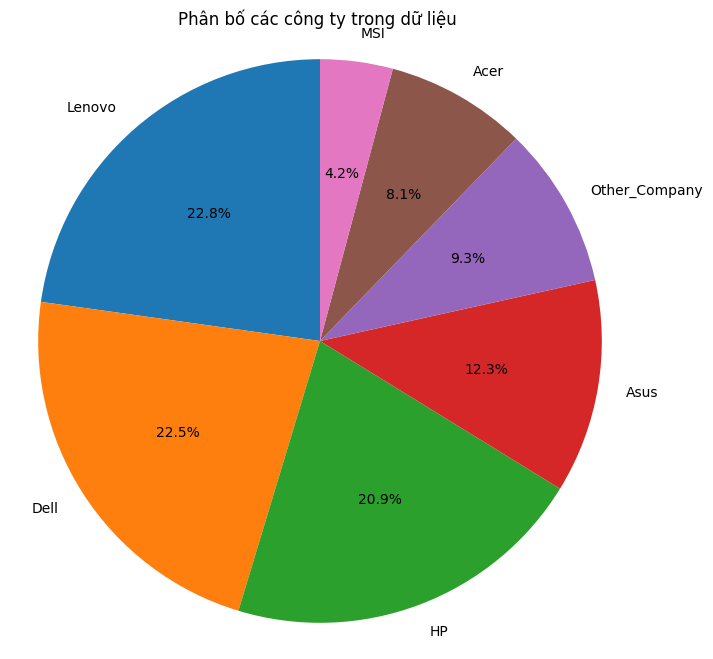

Company
Lenovo           290
Dell             287
HP               266
Asus             156
Other_Company    118
Acer             103
MSI               53
Name: count, dtype: int64


In [60]:

# Danh sách các công ty cần giữ lại
companies_to_keep = ['Lenovo', 'Dell', 'HP', 'Asus', 'Acer', 'MSI',]

# Thay thế các công ty không có trong danh sách trên bằng 'Other_Company'
df2['Company'] = df2['Company'].apply(lambda x: x if x in companies_to_keep else 'Other_Company')

# Tính số lượng mỗi giá trị trong cột 'Company' sau khi nhóm lại
company_counts = df2['Company'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))  # Đặt kích thước hình ảnh
plt.pie(company_counts, labels=company_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Phân bố các công ty trong dữ liệu ')
plt.axis('equal')  # Đảm bảo biểu đồ tròn đều
plt.show()

print(company_counts)


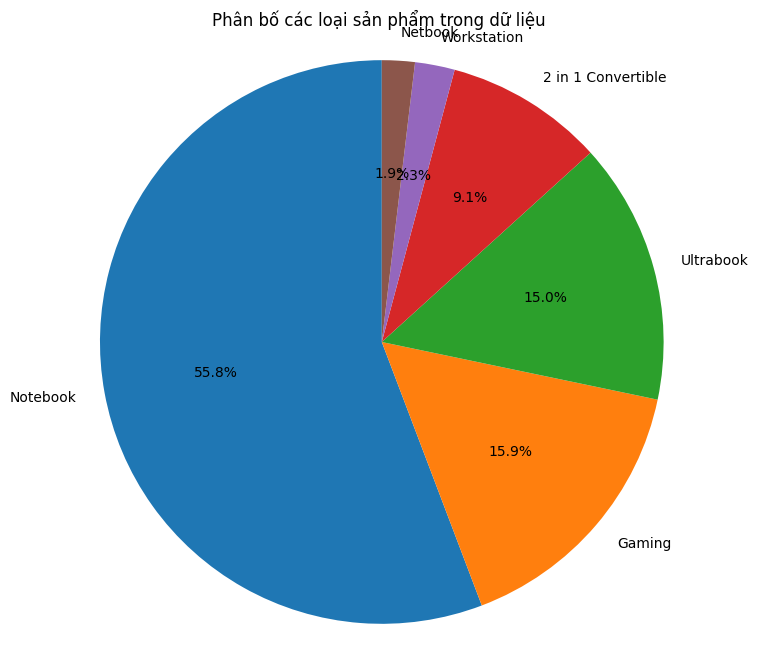

TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64


In [61]:


# Danh sách các loại sản phẩm cần giữ lại
typenames_to_keep = ['Notebook', 'Ultrabook', 'Gaming', '2 in 1 Convertible', 'Workstation', 'Netbook']

# Thay thế các loại sản phẩm không có trong danh sách trên bằng 'Other_Type'
df2['TypeName'] = df2['TypeName'].apply(lambda x: x if x in typenames_to_keep else 'Other_Type')

# Tính số lượng mỗi giá trị trong cột 'TypeName' sau khi nhóm lại
typename_counts = df2['TypeName'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))  # Đặt kích thước hình ảnh
plt.pie(typename_counts, labels=typename_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Phân bố các loại sản phẩm trong dữ liệu ')
plt.axis('equal')  # Đảm bảo biểu đồ tròn đều
plt.show()

print(typename_counts)


In [62]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', nan, 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7', 'Android'], dtype=object)

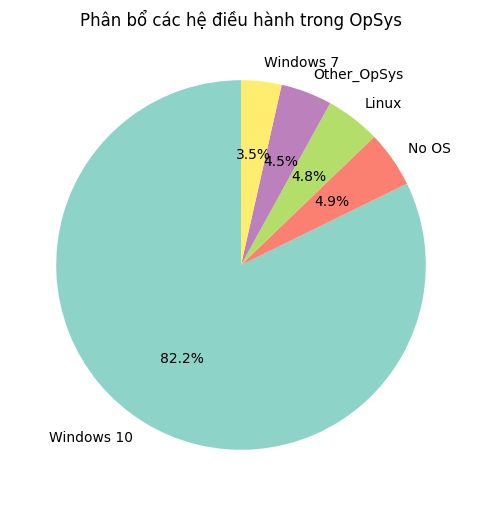

OpSys
Windows 10     1047
No OS            63
Linux            61
Other_OpSys      57
Windows 7        45
Name: count, dtype: int64


In [63]:
# Lọc các hệ điều hành phổ biến và gán các hệ điều hành còn lại vào 'Other_OpSys'
top_5_op_sys = ['Windows 10', 'No OS', 'Linux', 'Windows 7']
df2['OpSys'] = df2['OpSys'].apply(lambda x: x if x in top_5_op_sys else 'Other_OpSys')

# Kiểm tra phân bổ của trường OpSys sau khi xử lý
op_sys_counts = df2['OpSys'].value_counts()

# Vẽ sơ đồ tròn cho OpSys
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
op_sys_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Phân bổ các hệ điều hành trong OpSys')
plt.ylabel('')  # Tắt nhãn y
plt.show()

# In phân bổ các hệ điều hành
print(op_sys_counts)


In [64]:
df2['Ram'].unique()

array([ 8, 16,  4,  2, 12, 64,  6, 32, 24,  1])

In [65]:
# Kiểm tra phân bố dữ liệu trong cột 'Ram'
print(df2['Ram'].value_counts())


Ram
8     601
4     367
16    194
6      40
12     25
2      22
32     17
64      3
24      3
1       1
Name: count, dtype: int64


In [132]:
print(df2['OpSys'].value_counts())

OpSys
Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64


Ram
8            601
4            367
16           194
Other_Ram     46
6             40
12            25
Name: count, dtype: int64


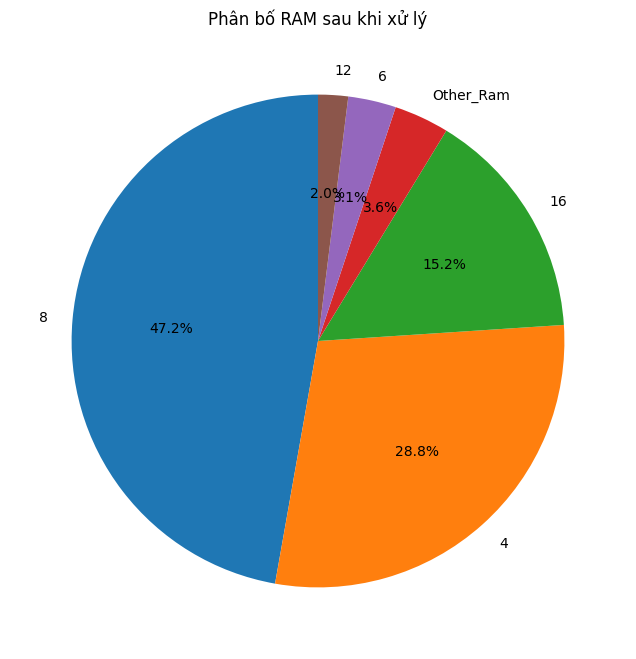

In [66]:
# Danh sách các giá trị RAM cần giữ lại
ram_values_to_keep = ['8', '4', '16', '6', '12']

# Chuyển tất cả các giá trị trong cột 'Ram' thành chuỗi để tiện so sánh
df2['Ram'] = df2['Ram'].astype(str)

# Chỉ giữ các giá trị RAM trong danh sách cần giữ, các giá trị khác gán thành 'Other_Ram'
df2['Ram'] = df2['Ram'].apply(lambda x: x if x in ram_values_to_keep else 'Other_Ram')

# Kiểm tra lại phân phối sau khi thay đổi
print(df2['Ram'].value_counts())

# Vẽ biểu đồ phân bố
ram_counts = df2['Ram'].value_counts()
ram_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Phân bố RAM sau khi xử lý')
plt.ylabel('')
plt.show()


In [ ]:
# Chuyển tất cả các giá trị trong cột 'Ram' thành chuỗi để tiện so sánh
df2['Ram'] = df2['Ram'].astype(str)

# Kiểm tra lại phân phối sau khi giữ nguyên tất cả các giá trị RAM
print(df2['Ram'].value_counts())

# Vẽ biểu đồ phân bố cho tất cả các giá trị RAM
ram_counts = df2['Ram'].value_counts()
ram_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Phân bố RAM sau khi xử lý')
plt.ylabel('')  # Không hiển thị nhãn cho trục y
plt.show()

In [133]:
# Danh sách các hãng cần giữ cho cột Company
companies = ['Lenovo', 'Dell', 'HP', 'Asus', 'MSI']

# 1. Xử lý cột Company và tạo các cột cho mỗi hãng cần giữ
for company in companies:
    df2[company] = df2['Company'].apply(lambda x: 1 if x == company else 0)

# Tạo cột Other_Comp cho những hãng không có trong danh sách
df2['Other_Comp'] = df2['Company'].apply(lambda x: 1 if x not in companies else 0)

columns_to_save = companies + ['Other_Comp']
# Lấy các cột cần thiết
df_to_save = df2[columns_to_save]

print(df_to_save.head(20))  # In ra 20 dòng đầu tiên

    Lenovo  Dell  HP  Asus  MSI  Other_Comp
0        0     0   0     0    0           1
1        0     0   0     0    0           1
2        0     0   1     0    0           0
3        0     0   0     0    0           1
4        0     0   0     0    0           1
5        0     0   0     0    0           1
6        0     0   0     0    0           1
7        0     0   0     0    0           1
8        0     0   0     1    0           0
9        0     0   0     0    0           1
10       0     0   1     0    0           0
11       0     0   1     0    0           0
12       0     0   0     0    0           1
13       0     1   0     0    0           0
14       0     0   0     0    0           1
15       0     0   0     0    0           1
16       0     1   0     0    0           0
17       0     0   0     0    0           1
18       1     0   0     0    0           0
19       0     1   0     0    0           0


In [134]:
# 2. Danh sách các giá trị cần giữ cho cột TypeName
type_name_values = ['Notebook', 'Gaming', 'Ultrabook', '2 in 1 Convertible', 'Workstation', 'Netbook']

# Xử lý cột TypeName và tạo các cột cho mỗi giá trị TypeName cần giữ
for type_name in type_name_values:
    df2[type_name] = df2['TypeName'].apply(lambda x: 1 if x == type_name else 0)

# Tạo cột Other_TypeName cho các giá trị không có trong danh sách
df2['Other_TypeName'] = df2['TypeName'].apply(lambda x: 1 if x not in type_name_values else 0)

columns_to_save = type_name_values + ['Other_TypeName']
# Lấy các cột cần thiết
df_to_save = df2[columns_to_save]

print(df_to_save.head(20))  # In ra 20 dòng đầu tiên

    Notebook  Gaming  Ultrabook  2 in 1 Convertible  Workstation  Netbook  \
0          0       0          1                   0            0        0   
1          0       0          1                   0            0        0   
2          1       0          0                   0            0        0   
3          0       0          1                   0            0        0   
4          0       0          1                   0            0        0   
5          1       0          0                   0            0        0   
6          0       0          1                   0            0        0   
7          0       0          1                   0            0        0   
8          0       0          1                   0            0        0   
9          0       0          1                   0            0        0   
10         1       0          0                   0            0        0   
11         1       0          0                   0            0        0   

In [135]:
#  3. Danh sách các giá trị cần giữ cho cột Ram
# Chuyển đổi cột 'Ram' thành số thực trong cột 'Ram_Number'
df2['Ram_Number'] = pd.to_numeric(df2['Ram'], errors='coerce')  # 'coerce' sẽ chuyển các giá trị không hợp lệ thành NaN

columns_to_save = ['Ram_Number']
# Lấy các cột cần thiết
df_to_save = df2[columns_to_save]

print(df_to_save.head(20))  # In ra 20 dòng đầu tiên

    Ram_Number
0            8
1            8
2            8
3           16
4            8
5            4
6           16
7            8
8           16
9            8
10           4
11           4
12          16
13           4
14           8
15           8
16           8
17          16
18           8
19           8


In [136]:
# 4. Xử lý cột OpSys để chia thành 'Windows' và 'Other_OpSys'
df2['Windows'] = df2['OpSys'].apply(lambda x: 1 if x in ['Windows 10', 'Windows 7'] else 0)

# Tạo cột Other_OpSys cho các giá trị không phải Windows
df2['Other_OpSys'] = df2['OpSys'].apply(lambda x: 1 if x not in ['Windows 10', 'Windows 7'] else 0)

columns_to_save = ['Windows', 'Other_OpSys']
# Lấy các cột cần thiết
df_to_save = df2[columns_to_save]

print(df_to_save.head(20))  # In ra 20 dòng đầu tiên

    Windows  Other_OpSys
0         0            1
1         0            1
2         0            1
3         0            1
4         0            1
5         1            0
6         0            1
7         0            1
8         1            0
9         1            0
10        0            1
11        0            1
12        0            1
13        1            0
14        0            1
15        0            1
16        1            0
17        0            1
18        0            1
19        1            0


In [ ]:

# Đọc dữ liệu từ file CSV
file_path = './laptopData_filtered_cleaned.csv'
df2 = pd.read_csv(file_path)

# Danh sách các hãng cần giữ cho cột Company
companies = ['Lenovo', 'Dell', 'HP', 'Asus', 'MSI']

# 1. Xử lý cột Company và tạo các cột cho mỗi hãng cần giữ
for company in companies:
    df2[company] = df2['Company'].apply(lambda x: 1 if x == company else 0)

# Tạo cột Other_Comp cho những hãng không có trong danh sách
df2['Other_Comp'] = df2['Company'].apply(lambda x: 1 if x not in companies else 0)

# 2. Danh sách các giá trị cần giữ cho cột TypeName
type_name_values = ['Notebook', 'Gaming', 'Ultrabook', '2 in 1 Convertible', 'Workstation', 'Netbook']

# Xử lý cột TypeName và tạo các cột cho mỗi giá trị TypeName cần giữ
for type_name in type_name_values:
    df2[type_name] = df2['TypeName'].apply(lambda x: 1 if x == type_name else 0)

# Tạo cột Other_TypeName cho các giá trị không có trong danh sách
df2['Other_TypeName'] = df2['TypeName'].apply(lambda x: 1 if x not in type_name_values else 0)

#  3. Danh sách các giá trị cần giữ cho cột Ram
# Chuyển đổi cột 'Ram' thành số thực trong cột 'Ram_Number'
df2['Ram_Number'] = pd.to_numeric(df2['Ram'], errors='coerce')  # 'coerce' sẽ chuyển các giá trị không hợp lệ thành NaN

# 4. Xử lý cột OpSys để chia thành 'Windows' và 'Other_OpSys'
df2['Windows'] = df2['OpSys'].apply(lambda x: 1 if x in ['Windows 10', 'Windows 7'] else 0)

# Tạo cột Other_OpSys cho các giá trị không phải Windows
df2['Other_OpSys'] = df2['OpSys'].apply(lambda x: 1 if x not in ['Windows 10', 'Windows 7'] else 0)

# 5. Giữ lại chỉ các cột cần thiết (các cột đã xử lý từ 'Company', 'TypeName', 'Ram', 'OpSys')
columns_to_save = companies + ['Other_Comp'] + type_name_values + ['Other_TypeName'] + ['Ram_Number'] + ['Windows', 'Other_OpSys']

# Lấy các cột cần thiết
df_to_save = df2[columns_to_save]

In [111]:
# Kết nối tới MongoDB
client = MongoClient('mongodb://localhost:27017/')  # Sử dụng URL kết nối MongoDB của bạn
db = client['LaptopDB']  # Tạo hoặc kết nối tới database
collection = db['Laptops']  # Tạo hoặc kết nối tới collection

# Chuyển DataFrame thành danh sách các từ điển (dictionaries)
records = df_to_save.to_dict(orient='records')

# Lưu vào MongoDB
collection.insert_many(records)



    Lenovo  Dell  HP  Asus  MSI  Other_Comp  Notebook  Gaming  Ultrabook  \
0        0     0   0     0    0           1         0       0          1   
1        0     0   0     0    0           1         0       0          1   
2        0     0   1     0    0           0         1       0          0   
3        0     0   0     0    0           1         0       0          1   
4        0     0   0     0    0           1         0       0          1   
5        0     0   0     0    0           1         1       0          0   
6        0     0   0     0    0           1         0       0          1   
7        0     0   0     0    0           1         0       0          1   
8        0     0   0     1    0           0         0       0          1   
9        0     0   0     0    0           1         0       0          1   
10       0     0   1     0    0           0         1       0          0   
11       0     0   1     0    0           0         1       0          0   
12       0  